In [259]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy as np
from sklearn.model_selection import train_test_split

In [260]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
dataframe = pandas.read_csv(url, header=-1)

In [261]:
dataframe.groupby(dataframe.columns[-1]).count()

,0,1,2,3,4,5,6,7
8,,,,,,,,
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,15,15,15,15,15,15,15,15
4,57,57,57,57,57,57,57,57
5,115,115,115,115,115,115,115,115
6,259,259,259,259,259,259,259,259
7,391,391,391,391,391,391,391,391
8,568,568,568,568,568,568,568,568
9,689,689,689,689,689,689,689,689


In [262]:
#df = dataframe.drop(dataframe[dataframe.iloc[:,-1] < 9].index)
#df = df.drop(dataframe[dataframe.iloc[:,-1] > 10].index)
#dataframe = dataframe.drop(dataframe[dataframe.iloc[:,-1] > 20])



In [263]:
#df.groupby(df.columns[-1]).count()

In [264]:
#ONE-HOT ENCODING
dumm = pandas.get_dummies(dataframe, prefix=None, prefix_sep='_', dummy_na=False, columns=[0,8], sparse=False, drop_first=False)

y = dumm.as_matrix(columns=dumm.columns[-28:])
X = dumm.as_matrix(columns=dumm.columns[:-28])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [269]:
print(y.shape)

(4177, 28)


In [270]:
%run -i lib/functions
%run -i lib/infrastructure

In [271]:
net = NeuralNet(X.shape[1], y.shape[1])

input_layer = InputLayer(input_size=X.shape[1])
first_layer = Layer(HyperbolicTangent, out_size=25)
second_layer = Layer(ReLU, out_size=19)
out_layer = OutputLayer(SoftMax, y.shape[1], CrossEntropy)

input_to_first_connection = Connection(input_layer, X.shape[1], 25)
first_layer.add_connection(input_to_first_connection)

first_to_second_connection = Connection(first_layer, 25, 19)
second_layer.add_connection(first_to_second_connection)

second_to_third_connection = Connection(second_layer, 19, y.shape[1])
input_to_third_connection = Connection(input_layer, X.shape[1], y.shape[1])
out_layer.add_connection(second_to_third_connection)
out_layer.add_connection(input_to_third_connection)


net.add_layer(input_layer)
net.add_layer(first_layer)
net.add_layer(second_layer)
net.add_layer(out_layer)

In [272]:
errors = net.train(X_train, y_train, 1000, 0.002, 55)


Epoch: 0; Error: 241.6912178231539;
Epoch: 1; Error: 230.36643435200645;
Epoch: 2; Error: 225.65167708692164;
Epoch: 3; Error: 222.96899864302833;
Epoch: 4; Error: 221.15032123598834;
Epoch: 5; Error: 219.8168485483874;
Epoch: 6; Error: 218.7019718182707;
Epoch: 7; Error: 217.87523876104612;
Epoch: 8; Error: 217.15710546860421;
Epoch: 9; Error: 216.546262276775;
Epoch: 10; Error: 215.98270440543024;
Epoch: 11; Error: 215.5627635173549;
Epoch: 12; Error: 215.10904677771163;
Epoch: 13; Error: 214.69035926959575;
Epoch: 14; Error: 214.25419381159108;
Epoch: 15; Error: 213.9451182186428;
Epoch: 16; Error: 213.57207119248955;
Epoch: 17; Error: 213.27602260678964;
Epoch: 18; Error: 212.98449834868148;
Epoch: 19; Error: 212.69619061847587;
Epoch: 20; Error: 212.39291165389344;
Epoch: 21; Error: 212.14177296397725;
Epoch: 22; Error: 211.88728740272626;
Epoch: 23; Error: 211.653960428429;
Epoch: 24; Error: 211.35944743742024;
Epoch: 25; Error: 211.11170720664012;
Epoch: 26; Error: 210.853273995

Epoch: 215; Error: 188.46108504616834;
Epoch: 216; Error: 188.1407099024934;
Epoch: 217; Error: 188.1768546999545;
Epoch: 218; Error: 188.35532288418617;
Epoch: 219; Error: 188.24140371318262;
Epoch: 220; Error: 188.27942226395092;
Epoch: 221; Error: 188.2945923905448;
Epoch: 222; Error: 188.21763792173323;
Epoch: 223; Error: 188.17438455055236;
Epoch: 224; Error: 188.15624413920858;
Epoch: 225; Error: 188.14091634331643;
Epoch: 226; Error: 188.13357013330045;
Epoch: 227; Error: 188.14456389173367;
Epoch: 228; Error: 188.12652419107005;
Epoch: 229; Error: 188.05234568143277;
Epoch: 230; Error: 188.062367945179;
Epoch: 231; Error: 188.27981327914904;
Epoch: 232; Error: 188.2678507070921;
Epoch: 233; Error: 188.07421479057206;
Epoch: 234; Error: 188.07262444077622;
Epoch: 235; Error: 188.06106304572046;
Epoch: 236; Error: 188.12150657184458;
Epoch: 237; Error: 188.1010691798575;
Epoch: 238; Error: 188.0987166199273;
Epoch: 239; Error: 188.07427464935205;
Epoch: 240; Error: 188.0572721451

Epoch: 428; Error: 186.02846425330566;
Epoch: 429; Error: 186.07235592943263;
Epoch: 430; Error: 185.6753653194368;
Epoch: 431; Error: 186.08816419200977;
Epoch: 432; Error: 185.6562842598261;
Epoch: 433; Error: 185.67653839663998;
Epoch: 434; Error: 185.90708185284936;
Epoch: 435; Error: 186.04640489980176;
Epoch: 436; Error: 186.03617495470817;
Epoch: 437; Error: 185.9659457934829;
Epoch: 438; Error: 185.96160708972712;
Epoch: 439; Error: 185.9536932215063;
Epoch: 440; Error: 185.9515486436514;
Epoch: 441; Error: 185.86699741246176;
Epoch: 442; Error: 185.92006319261864;
Epoch: 443; Error: 185.84472963328508;
Epoch: 444; Error: 185.92924691725975;
Epoch: 445; Error: 185.83547476401986;
Epoch: 446; Error: 185.9291375613102;
Epoch: 447; Error: 185.8306374835909;
Epoch: 448; Error: 185.90277914045262;
Epoch: 449; Error: 185.8989026408945;
Epoch: 450; Error: 185.88795179146268;
Epoch: 451; Error: 185.88534075813843;
Epoch: 452; Error: 185.8936606539625;
Epoch: 453; Error: 185.88532754724

Epoch: 643; Error: 184.64085764373394;
Epoch: 644; Error: 184.64729023693204;
Epoch: 645; Error: 184.49337925747204;
Epoch: 646; Error: 184.54766690585137;
Epoch: 647; Error: 184.60254983008454;
Epoch: 648; Error: 184.63408564588423;
Epoch: 649; Error: 184.5086135054407;
Epoch: 650; Error: 184.5446378489475;
Epoch: 651; Error: 184.56331345823315;
Epoch: 652; Error: 184.53773719407852;
Epoch: 653; Error: 184.3411087222872;
Epoch: 654; Error: 184.5493095818144;
Epoch: 655; Error: 184.55032662144882;
Epoch: 656; Error: 184.34736276009045;
Epoch: 657; Error: 184.32709767852742;
Epoch: 658; Error: 184.4855864130459;
Epoch: 659; Error: 184.53383529243322;
Epoch: 660; Error: 184.56091788265886;
Epoch: 661; Error: 184.52178261484642;
Epoch: 662; Error: 184.53605516969264;
Epoch: 663; Error: 184.33804964071717;
Epoch: 664; Error: 184.5699828900777;
Epoch: 665; Error: 184.34547587064282;
Epoch: 666; Error: 184.36833726229702;
Epoch: 667; Error: 184.55324087613965;
Epoch: 668; Error: 184.56213480

Epoch: 859; Error: 183.83479519806428;
Epoch: 860; Error: 183.5466667204967;
Epoch: 861; Error: 183.80669387862625;
Epoch: 862; Error: 183.8098445526859;
Epoch: 863; Error: 183.81580559186025;
Epoch: 864; Error: 183.72452248908817;
Epoch: 865; Error: 183.81195489850322;
Epoch: 866; Error: 183.59702117080283;
Epoch: 867; Error: 183.7279982484246;
Epoch: 868; Error: 183.57452892529278;
Epoch: 869; Error: 183.80241602621254;
Epoch: 870; Error: 183.6858936313146;
Epoch: 871; Error: 183.53279767960325;
Epoch: 872; Error: 183.54427651460676;
Epoch: 873; Error: 183.78808566026058;
Epoch: 874; Error: 183.47851595007833;
Epoch: 875; Error: 183.75940707707468;
Epoch: 876; Error: 183.45716357089904;
Epoch: 877; Error: 183.7736159313583;
Epoch: 878; Error: 183.7403241317765;
Epoch: 879; Error: 183.46202615149483;
Epoch: 880; Error: 183.49351709694565;
Epoch: 881; Error: 183.70292262796934;
Epoch: 882; Error: 183.47601730977973;
Epoch: 883; Error: 183.58730471979794;
Epoch: 884; Error: 183.71388712

In [273]:
prediction = net.predict(X_test).T
print(net.get_accuracy(prediction, y_test))

0.2632342277012328


In [274]:
epochs_num = 10

batches = [10,40,70]
learning_rates = [0.01, 0.005, 0.001]

batches = [20,30,40,60]
learning_rates = [0.0001,0.001,0.005,0.002]

results = dict()

results['batches'] = []
results['rates'] = []

for batch in batches:
    results['batches'].append(net.train(X_train, y_train, epochs_num, 0.01, batch, False))
        
for rate in learning_rates:
    results['rates'].append(net.train(X_train, y_train, epochs_num, rate, 40, False ))
        

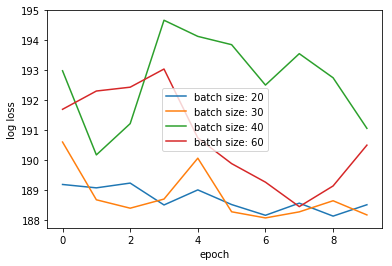

In [275]:
experiments_with_batch = results['batches']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_batch:
     ax.plot(experiment['epoch'], experiment['log_loss'], label=experiment['batch_size']);

plt.ylabel('log loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

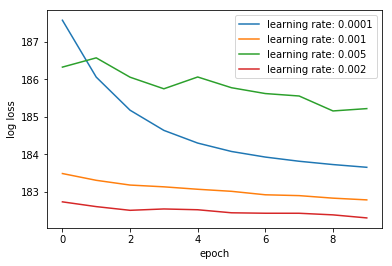

In [276]:
experiments_with_rates = results['rates']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_rates:
    ax.plot(experiment['epoch'], experiment['log_loss'], label=experiment['learning_rate']);

plt.ylabel('log loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

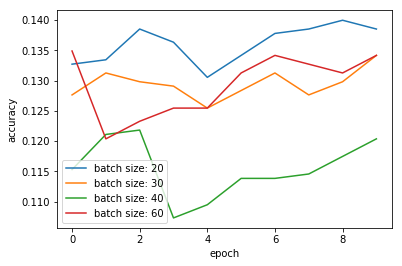

In [277]:
experiments_with_batch = results['batches']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_batch:
     ax.plot(experiment['epoch'], experiment['accuracy'], label=experiment['batch_size']);

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


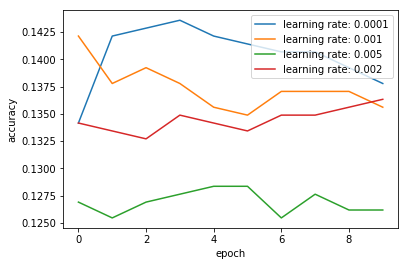

In [278]:
experiments_with_batch = results['rates']
        
fig = plt.figure()
ax = plt.axes()

for experiment in experiments_with_batch:
     ax.plot(experiment['epoch'], experiment['accuracy'], label=experiment['learning_rate']);

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [279]:
net_t = NeuralNet(X.shape[1], y.shape[1])

input_layer = InputLayer(input_size=X.shape[1])
first_layer = Layer(HyperbolicTangent, out_size=25)
second_layer = Layer(ReLU, out_size=19)
out_layer = OutputLayer(HyperbolicTangent, y.shape[1], CrossEntropy)

input_to_first_connection = Connection(input_layer, X.shape[1], 25)
first_layer.add_connection(input_to_first_connection)

first_to_second_connection = Connection(first_layer, 25, 19)
second_layer.add_connection(first_to_second_connection)

second_to_third_connection = Connection(second_layer, 19, y.shape[1])
input_to_third_connection = Connection(input_layer, X.shape[1], y.shape[1])
out_layer.add_connection(second_to_third_connection)
out_layer.add_connection(input_to_third_connection)


net_t.add_layer(input_layer)
net_t.add_layer(first_layer)
net_t.add_layer(second_layer)
net_t.add_layer(out_layer)

In [280]:
errors = net_t.train(X_train, y_train, 1000, 0.002, 55)

Epoch: 0; Error: nan;
Epoch: 1; Error: nan;
Epoch: 2; Error: nan;
Epoch: 3; Error: nan;
Epoch: 4; Error: nan;
Epoch: 5; Error: nan;
Epoch: 6; Error: nan;
Epoch: 7; Error: nan;
Epoch: 8; Error: nan;
Epoch: 9; Error: nan;
Epoch: 10; Error: nan;
Epoch: 11; Error: nan;
Epoch: 12; Error: nan;
Epoch: 13; Error: nan;
Epoch: 14; Error: nan;
Epoch: 15; Error: nan;
Epoch: 16; Error: nan;
Epoch: 17; Error: nan;
Epoch: 18; Error: nan;
Epoch: 19; Error: nan;
Epoch: 20; Error: nan;
Epoch: 21; Error: nan;
Epoch: 22; Error: nan;
Epoch: 23; Error: nan;
Epoch: 24; Error: nan;
Epoch: 25; Error: nan;
Epoch: 26; Error: nan;
Epoch: 27; Error: nan;
Epoch: 28; Error: nan;
Epoch: 29; Error: nan;
Epoch: 30; Error: nan;
Epoch: 31; Error: nan;
Epoch: 32; Error: nan;
Epoch: 33; Error: nan;
Epoch: 34; Error: nan;
Epoch: 35; Error: nan;
Epoch: 36; Error: nan;
Epoch: 37; Error: nan;
Epoch: 38; Error: nan;
Epoch: 39; Error: nan;
Epoch: 40; Error: nan;
Epoch: 41; Error: nan;
Epoch: 42; Error: nan;
Epoch: 43; Error: nan

Epoch: 347; Error: nan;
Epoch: 348; Error: nan;
Epoch: 349; Error: nan;
Epoch: 350; Error: nan;
Epoch: 351; Error: nan;
Epoch: 352; Error: nan;
Epoch: 353; Error: nan;
Epoch: 354; Error: nan;
Epoch: 355; Error: nan;
Epoch: 356; Error: nan;
Epoch: 357; Error: nan;
Epoch: 358; Error: nan;
Epoch: 359; Error: nan;
Epoch: 360; Error: nan;
Epoch: 361; Error: nan;
Epoch: 362; Error: nan;
Epoch: 363; Error: nan;
Epoch: 364; Error: nan;
Epoch: 365; Error: nan;
Epoch: 366; Error: nan;
Epoch: 367; Error: nan;
Epoch: 368; Error: nan;
Epoch: 369; Error: nan;
Epoch: 370; Error: nan;
Epoch: 371; Error: nan;
Epoch: 372; Error: nan;
Epoch: 373; Error: nan;
Epoch: 374; Error: nan;
Epoch: 375; Error: nan;
Epoch: 376; Error: nan;
Epoch: 377; Error: nan;
Epoch: 378; Error: nan;
Epoch: 379; Error: nan;
Epoch: 380; Error: nan;
Epoch: 381; Error: nan;
Epoch: 382; Error: nan;
Epoch: 383; Error: nan;
Epoch: 384; Error: nan;
Epoch: 385; Error: nan;
Epoch: 386; Error: nan;
Epoch: 387; Error: nan;
Epoch: 388; Erro

KeyboardInterrupt: 